In [1]:
import os
import math
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams["svg.fonttype"]="none"

In [5]:
#03yes reduced classes (8) and text files (343)
#folder_path=os.chdir("/Users/Vivo-Na/Downloads/03_Yes_reduced")

#folder_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/FromNa1/V9-28juin/class/03_Yes_reduced")
#folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/FromNa1/V9-28juin/class/03_Yes_reduced"
folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/PopPlinn/class/PopPlinnTxt"

#folder_path="/Users/Vivo-Na/Downloads/03_Yes/"

filelist = []
for path, dirs, files in os.walk(folder_path):
    for filename in files:
        if 'txt' in filename :
                filelist.append(filename)
#print (filelist)
print(len(filelist))


#get classes in string
#class_path=os.chdir("/Users/Vivo-Na/Desktop/class/")
#class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/FromNa1/V9-28juin/class/")

class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/PopPlinn/class/PopPlinnTxt/")

#filetext="03yes_class_reduced.txt"
#with open(filetext) as f:
#        classes = f.read().splitlines()
#print(classes)  


#filetext="03popplinn_class_reduced.txt"
#with open(filetext) as f:
#        classes = f.read().splitlines()
#print(classes)  

79


In [6]:
def f_to_midi (f) :
    return 69+12*math.log(f/440,2)

print ("note de freq 261Hz :" , f_to_midi (261))

def midi_to_f (n) :
    return 440*2**((n-69)/12)

print ("frequence de note 60 :" , midi_to_f (60), "Hz")


note de freq 261Hz : 59.95855539654269
frequence de note 60 : 261.6255653005986 Hz


In [7]:

f_ls = [21.5,32.3,43.1,53.8,64.6,86.1,107.7,140.0,172.3,215.3,269.2,344.5,441.4,549.1,699.8,872.1,1109.0,1388.9,1755.0,2217.9,2788.5,3520.7,4435.8,5587.9,7041.4,8871.7,11175.7,14071.9]

L = [] # liste des tailles des lignes
for k in range(27):
    L.append(4+2*k)

f_c = [] # frequences centrales des bandes
for i in range(len(f_ls)-1):
    f_c.append(math.sqrt(f_ls[i+1]*f_ls[i]))
    
f_c_midi = []
for i in range(len(f_c)):
    f_c_midi.append(f_to_midi(f_c[i]))

f_c_moy = 0 
for i in range(len(f_c)):
    f_c_moy += f_c[i]
    f_c_moy /= 27
    
f_c_gmoy = 0
for i in range(len(f_c)):
    f_c_gmoy += math.log(f_c[i], 2)
    f_c_gmoyR =  2**(f_c_gmoy/27)

#formule equivalente
#f_c_gmoy2 = 0
#for i in range(len(f_c)):
#    f_c_gmoy2 += f_to_midi(f_c[i])
#    f_c_gmoyR2 =  midi_to_f(f_c_gmoy2/27)

    
print("len(f_ls) :", len(f_ls), "bornes")
W=[]
for i in range(len(f_ls)-1):
    W.append(round(f_ls[i+1]-f_ls[i], 2))
print("w :" , W)    
    
print ("f_c :", f_c)
print ("f_c_moy :", round(f_c_moy,1), "Hz") # (en Hz) moyenne des frequences des centres des bandes 
print ("f_c_gmoyR :", round(f_c_gmoyR,1), "Hz") # (en Hz) moyenne des centres calculée par les notes MIDI
#print ("f_c_gmoyR :", f_c_gmoyR2) # (en Hz) moyenne des centres calculée par les notes MIDI

f_cA = np.asarray(f_c)
f_cA = f_cA[:, np.newaxis]
#print (round(3.149 , 2))


len(f_ls) : 28 bornes
w : [10.8, 10.8, 10.7, 10.8, 21.5, 21.6, 32.3, 32.3, 43.0, 53.9, 75.3, 96.9, 107.7, 150.7, 172.3, 236.9, 279.9, 366.1, 462.9, 570.6, 732.2, 915.1, 1152.1, 1453.5, 1830.3, 2304.0, 2896.2]
f_c : [26.352419243781014, 37.311258354550304, 48.15371221411699, 58.95320177903826, 74.57921962584483, 96.29626160968036, 122.79250791477467, 155.31258802814406, 192.60371232143996, 240.74625646102996, 304.53144336833265, 389.95166367128115, 492.31366018017417, 619.8872316800855, 781.2141703783924, 983.4423724855463, 1241.0842437159533, 1561.255744585108, 1972.9202974271413, 2486.8884474378824, 3133.28453064831, 3951.8503337044535, 4978.6350358306045, 6272.689938136588, 7903.745212239575, 9957.28164159275, 12540.467807462368]
f_c_moy : 478.5 Hz
f_c_gmoyR : 612.6 Hz


In [8]:
# read filetxt and generate array S
def read(filetext):
    with open(filetext) as f:
        mylist = f.read().splitlines()
        for x in range(8):
            mylist.pop(0)
        S=[]
        for element in reversed(mylist):
            element2=[float(i) for i in element.split()]
            S.append(element2)
        return S
    

In [9]:
#file1 = "AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_32_50_t02_50_pas02_50.txt"
file1 = "AlanStivell_PopPlinn_1971m.wav_sr44100_deb01_02_50_t02_50_pas02_50.txt"
S1 = read(file1)

#print (S)
#file1 = "noise.wav_sr44100_deb00_00_00_t01_99.txt"
#file1 = "sinus500.wav_sr44100_deb00_00_00_t02_00.txt"
#file1 = "pink.wav_sr44100_deb00_00_00_t02_00.txt"
#file1 = "son2dec.wav_sr44100_deb00_00_00_t02_00.txt"
#file1 = "son3gflat.wav_sr44100_deb00_00_00_t02_00.txt"
#file1 = "son3ginc.wav_sr44100_deb00_00_00_t02_00.txt"
#read(file1)

In [10]:
# plus file name unite comme secondes 
def timetxt (filetext):
    str_L = filetext.rsplit(sep='_')
    test = 0
    result = 0
    for str in str_L:
        if test == 3:
            cent = int(str)
            result+=(cent/100)
            test = 0
        if test == 2:
            sec = int(str)
            test = 3
            result+=sec
        if re.search('deb', str):
            test = 1
            min = int(str[4-5])
            result+=(min*60)
            test = 2
    return result

print(timetxt("AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_45_00_t02_50_pas02_50.txt"))
#timetxt("AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_45_00_t02_50_pas02_50.txt")


45.0


In [11]:
# moyennes des amplitudes par ligne (des fréquences basses vers hautes)
def moy_des_amps (S):
    Sk_mean=[]
    for k in range(27):
        sum_s=0
        for j in range(4+2*k):
            sum_s+=S[k][j]
        Sk_mean.append(sum_s/(4+2*k))
    return Sk_mean  
print("amps:",moy_des_amps(S1))

amps: [0.001903, 0.002326833333333333, 0.00388625, 0.007345300000000001, 0.04093575, 0.06096792857142857, 0.0496956875, 0.050534777777777776, 0.07179319999999997, 0.05659654545454545, 0.03631945833333334, 0.026687230769230772, 0.03215614285714286, 0.013824033333333336, 0.0178050625, 0.03382120588235294, 0.038312388888888896, 0.036031157894736834, 0.031519599999999995, 0.02116523809523809, 0.021396090909090906, 0.01335178260869565, 0.0101090625, 0.005377160000000001, 0.004765999999999999, 0.004532611111111111, 0.003662482142857144]


In [12]:
#centroid
def centroid(S):
    Sk_mean = moy_des_amps(S)
    sum_sc=0
    sum_sfk=0
    for k in range(27):
        sum_sfk+=Sk_mean[k]*f_c[k]
        sum_sc+=Sk_mean[k]            
    if sum_sc == 0 :
        centroid=0
    else:
        centroid=sum_sfk/sum_sc
    #print('centroid' , centroid)
    return centroid

print("centroid:",round(centroid(S1)),"Hz")

centroid: 998 Hz


In [13]:
#variance et sd
def variance(S):
    Sk_mean=[]
    for k in range(27):
        sum_s=0
        for j in range(4+2*k):
            sum_s+=S[k][j]
        Sk_mean.append(sum_s/(4+2*k))
    sum_var=0
    sum_skm=0
    for k in range(27):
        sum_var+=Sk_mean[k]*((f_c[k]-centroid(S))**2)
        sum_skm+=Sk_mean[k]
    variance=sum_var/sum_skm
    #print("variance", variance)
    return variance

# sd: 
def sd(filetext):
    sd=math.sqrt(variance(filetext))
    return sd

print("sd:",round(sd(S1)),"Hz")

sd: 1687 Hz


In [14]:
# sd: biased standard deviation (N)
def sdLow(S):
    Sk_mean = moy_des_amps(S)
    sum_sd=0
    sum_skm=0
    for k in range(27):
        diff=f_c[k]-centroid(S)
        if diff <0:
            sum_sd+=Sk_mean[k]*(diff**2)
            sum_skm+=Sk_mean[k]
    sdLow=math.sqrt(sum_sd/sum_skm)
    return sdLow

# sd: biased standard deviation (N)
def sdHigh(S):
    Sk_mean = moy_des_amps(S)
    sum_sd=0
    sum_skm=0
    for k in range(27):
        diff=f_c[k]-centroid(S)
        if diff >0:
            sum_sd+=Sk_mean[k]*(diff**2)
            sum_skm+=Sk_mean[k]
    sdHigh=math.sqrt(sum_sd/sum_skm)
    return sdHigh
    
def c_min_sdlow(S): 
    return round(centroid(S) - sdLow(S),1)

def c_plus_sdHi(S): 
    return round(centroid(S) + sdHigh(S),1)


print("centroid:", round(centroid(S1),1),"Hz")
print("centre-ecartlow:", c_min_sdlow(S1),"Hz")
print("centre+ecartHigh:", c_plus_sdHi(S1),"Hz")

centroid: 997.9 Hz
centre-ecartlow: 241.7 Hz
centre+ecartHigh: 3981.7 Hz


In [15]:
#MIDI centroid
def midi_centroid(S):
    Sk_mean = moy_des_amps(S)
    sum_sc=0
    sum_sfk=0
    for k in range(27):
        sum_sfk+=Sk_mean[k]*f_to_midi(f_c[k])
        sum_sc+=Sk_mean[k]            
    if sum_sc == 0 :
        midi_centroid=0
    else:
        midi_centroid=sum_sfk/sum_sc
    #print('centroid' , centroid)
    return midi_centroid

In [16]:
#ecartHigh
def midi_ecartHigh(S): 
    Sk_mean = moy_des_amps(S) 
    sum_var=0 
    sum_skm=0 
    for k in range(27): 
        df = f_to_midi(f_c[k])-midi_centroid(S) 
        if df>0:
            sum_var+=Sk_mean[k]*(df**2)
            sum_skm+=Sk_mean[k]
    varianceHigh=sum_var/sum_skm
    #print(\"variance\", variance)
    return math.sqrt(varianceHigh)

#ecartLow 
def midi_ecartLow(S): 
    Sk_mean = moy_des_amps(S) 
    sum_var=0 
    sum_skm=0 
    for k in range(27): 
        df = f_to_midi(f_c[k])-midi_centroid(S) 
        if df<0:
            sum_var+=Sk_mean[k]*(df**2)
            sum_skm+=Sk_mean[k]
    varianceLow=sum_var/sum_skm
    #print(\"variance\", variance)
    return math.sqrt(varianceLow)

def mc_min_eclow(S): 
    return round(midi_centroid(S) - midi_ecartLow(S),1)

def mc_plus_ecHi(S): 
    return round(midi_centroid(S) + midi_ecartHigh(S),1)

mcd = round(midi_centroid(S1),1)
mcd_eL = round(mc_min_eclow(S1),1)
mcd_eH = round(mc_plus_ecHi(S1),1)
print("midi_centroid:", mcd,"MIDI /", round(midi_to_f(mcd)),"Hz")
print("centr-ecartLow:", mcd_eL,"MIDI /", round(midi_to_f(mcd_eL),1),"Hz") 
print("centr+ecartHigh:", mcd_eH,"MIDI /", round(midi_to_f(mcd_eH),1),"Hz")


midi_centroid: 67.5 MIDI / 403 Hz
centr-ecartLow: 48.6 MIDI / 135.4 Hz
centr+ecartHigh: 94.5 MIDI / 1919.3 Hz


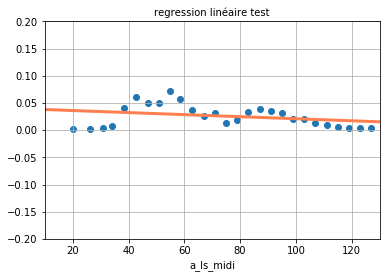

slope : -0.00018820454331496756


In [17]:
#midi spectral slope
def midi_spectral_slope_reg(S):
    f_csA_midi = np.asarray(f_c_midi)
    f_csA_midi = f_csA_midi[:, np.newaxis]
    Sk_meanA = np.asarray(moy_des_amps(S))
    Sk_meanA = Sk_meanA[:, np.newaxis]
    modeleReg = LinearRegression()
    modeleReg.fit(f_csA_midi, Sk_meanA)
    #plt.scatter(f_csA, Sk_meanA)
    return modeleReg

def midi_sp_slope (S):
    return midi_spectral_slope_reg(S).coef_[0][0]

def plot_slope(S):
    modeleReg = midi_spectral_slope_reg(S)
    f_csA_midi = np.asarray(f_c_midi)
    f_csA_midi = f_csA_midi[:, np.newaxis]
    Sk_meanA = np.asarray(moy_des_amps(S))
    Sk_meanA = Sk_meanA[:, np.newaxis]
    plt.scatter(f_csA_midi, Sk_meanA)
    
    x_min = 10
    x_max = 130

    X_NEW = np.linspace(x_min, x_max, 100)
    X_NEW = X_NEW[:,np.newaxis]

    Y_NEW = modeleReg.predict(X_NEW)

    plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)
    plt.grid()
    plt.xlim(x_min, x_max)
    plt.ylim(-0.2, 0.2)

    plt.title("regression linéaire test", fontsize=10)
    plt.xlabel('f_cs_midi')
    plt.xlabel('a_ls_midi')

    plt.savefig("simple_linear_regression_test_midi.png", bbox_inches='tight')
    plt.show()

plot_slope (S1)
print ("slope : " + str(midi_sp_slope(S1)))



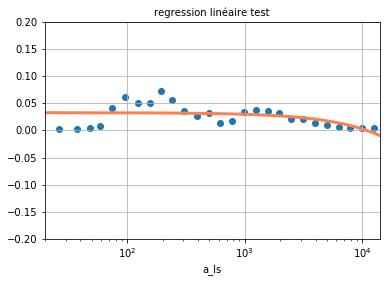

slope : -3.008010991203507e-06


In [18]:
#spectral slope
def spectral_slope_reg(S):
    f_csA = np.asarray(f_c)
    f_csA = f_csA[:, np.newaxis]
    Sk_meanA = np.asarray(moy_des_amps(S))
    Sk_meanA = Sk_meanA[:, np.newaxis]
    modeleReg = LinearRegression()
    modeleReg.fit(f_csA, Sk_meanA)
    #plt.scatter(f_csA, Sk_meanA)
    return modeleReg

def sp_slope (S):
    return spectral_slope_reg(S).coef_[0][0]

def plot_slope(S):
    modeleReg = spectral_slope_reg(S)
    f_csA = np.asarray(f_c)
    f_csA = f_csA[:, np.newaxis]
    Sk_meanA = np.asarray(moy_des_amps(S))
    Sk_meanA = Sk_meanA[:, np.newaxis]
    plt.scatter(f_csA, Sk_meanA)
    
    x_min = 20
    x_max = 14000

    X_NEW = np.linspace(x_min, x_max, 100)
    X_NEW = X_NEW[:,np.newaxis]

    Y_NEW = modeleReg.predict(X_NEW)

    plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)
    #plt.scale.LogScale
    plt.grid()
    plt.xlim(x_min, x_max)
    plt.txaxis=dict(type='log', autorange=True)
    plt.ylim(-0.2, 0.2)

    plt.title("regression linéaire test", fontsize=10)
    plt.xlabel('f_cs')
    plt.xlabel('a_ls')
    plt.xscale("log")

    plt.savefig("simple_linear_regression_test.png", bbox_inches='tight')
    plt.show()

plot_slope (S1)
print ("slope : " + str(sp_slope(S1)))



In [19]:
#spectral flatness 
def sp_flatness(S):
    Sk_mean = moy_des_amps(S)
    sum_skm=0
    mult_skm=1
    K=26
    for k in range(26):
        sum_skm+=Sk_mean[k]
        mult_skm*=max(Sk_mean[k], 0.00001)
        pow_skm=mult_skm**(1/K)
    if sum_skm == 0 :
        sf=0
    else:
        sf=pow_skm/((1/K)*sum_skm)
    return sf

print ("spectral_flatness:", sp_flatness(S1))

spectral_flatness: 0.6618243183621844


In [20]:
# moyennes des amplitudes par ligne (des fréquences basses vers hautes)
def produit_des_amps (S):
    Sk_mult=1
    for k in range(27):
        mult_s=1
        for j in range(4+2*k):
            mult_s*=max(S[k][j]**(0.5/(k+2)), 0.00000001)
        Sk_mult*=mult_s
    return Sk_mult  

# moyennes des amplitudes par ligne (des fréquences basses vers hautes)
def flatness_list (S):
    Sk_flat=[]
    for k in range(27):
        mult_s=1
        for j in range(4+2*k):
            mult_s*=max(S[k][j]**(0.5/(k+2)), 0.00000001)
        Sk_flat.append(mult_s)
    return Sk_flat  

#spectral flatness moyenne
def sp_flatness_moy(S):
    Sk_flat = flatness_list(S)
    Sm=0
    for k in range(27):
         Sm+=Sk_flat[k]
    #print(Sm)
    return Sm/27

#formule equivalente
def sp_flatness_moy2(S):
    Sk_flat = flatness_list(S)
    Sk_flatA = np.asarray(Sk_flat)
    return Sk_flatA.mean()

def sp_flatness_max(S):
    Sk_flat = flatness_list(S)
    Sm=0
    for k in range(27):
        if Sm<Sk_flat[k]:
            Sm=Sk_flat[k]
            value = k
    return [value, f_c[value], Sm]
         
    #print(Sm)
    return Sm/27

def sp_flatness_min(S):
    Sk_flat = flatness_list(S)
    Sm=1
    for k in range(27):
        if Sm>Sk_flat[k]:
            Sm=Sk_flat[k]
            value = k
    return [value, f_c[value], Sm]

def sp_flatness_maxamp(S):
    return sp_flatness_max(S)[2]
def sp_flatness_maxfreq(S):
    return sp_flatness_max(S)[1]
def sp_flatness_minamp(S):
    return sp_flatness_min(S)[2]
def sp_flatness_minfreq(S):
    return sp_flatness_min(S)[1]

print("sp_flatness_maxamp:", sp_flatness_maxamp(S1))
print("sp_flatness_maxfreq:", sp_flatness_maxfreq(S1))
print("sp_flatness_minamp:", sp_flatness_minamp(S1))
print("sp_flatness_minfreq:", sp_flatness_minfreq(S1))

sp_flatness_maxamp: 0.06465808607725208
sp_flatness_maxfreq: 192.60371232143996
sp_flatness_minamp: 0.0018649844542634535
sp_flatness_minfreq: 26.352419243781014


In [21]:
def sp_crest(S):
    Sk_mean = moy_des_amps(S)
    sum_skm=0
    K=27
    max_skm=[]
    for k in range(27):
        sum_skm+=Sk_mean[k]
        for j in range(4+2*k):
            max_skm.append(np.max(S[k][j]))
    max_sk=max(max_skm)
    screst=max_sk/((1/K)*sum_skm)
    return screst

print(sp_crest(S1))

4.503874860426


In [22]:

# rms with original value of frequency bin k=27
def rms(S):
    Sk_mean = moy_des_amps(S)
    sum_skr=[]
    for k in range(27):
        sum_sk=0
        for j in range(L[k]):
            sum_sk+= (1/L[k])*(S[k][j]**2)
        sum_skr.append(sum_sk)
    #print(sum_skr)
    sum_rms=0
    for k in range(27):
        sum_rms+=sum_skr[k]
    rms=math.sqrt(sum_rms)
    return rms  

print(rms(S1))

0.1806035216196576


In [23]:
# maxfreq25 (amp max de la bande 25) approx 8000Hz
def maxfreq25(S):
    maxfreq25=max(S[25])
    return maxfreq25

In [24]:
def skewness(S):
    Sk_mean = moy_des_amps(S)
    sum_sk=0
    sum_skm=0
    for k in range(27):
        sum_sk+=Sk_mean[k]*((f_c[k]-centroid(S))**3)
        sum_skm+=Sk_mean[k]
    skewness=(sum_sk/sum_skm)/(sd(S)**3)
    return skewness

print(skewness(S1))


def kurtosis(S):
    Sk_mean = moy_des_amps(S)
    sum_kt=0
    sum_skm=0
    for k in range(27):
        sum_kt+=Sk_mean[k]*((f_c[k]-centroid(S))**4)
        sum_skm+=Sk_mean[k]
    kurtosis=(sum_kt/sum_skm)/(sd(S)**4)
    return kurtosis

print(kurtosis(S1))

3.678744412284469
20.118103519552935


In [25]:
def sp_rolloff(S):
    Sk_mean = moy_des_amps(S)
    sum_skm=0
    sum_rf=0
    for k in range(27):
        sum_skm+=Sk_mean[k]
    for k in range(27):
        sum_rf+=Sk_mean[k]
        if sum_rf>=0.85*sum_skm:
            rf=f_c[k]
            break
    return rf

In [26]:
#amps max et min
def max_amp(S):
    maxs = []
    for k in range(27):
        maxs.append(max(S[k]))
    return max(maxs)

def max_amoy(S):
    return max(moy_des_amps(S))

def min_amp(S):
    mins = []
    for k in range(27):
        mins.append(min(S[k]))
    return min(mins)
                    
print('max_amp :',round(max_amp(S1),3))
print('max_amoy :',round(max_amoy(S1),3))
print('min_amp :',round(min_amp(S1),5))

max_amp : 0.116
max_amoy : 0.072
min_amp : 0.00032


In [27]:
def max_freq(S):
    maxs = []
    maxi = 0
    indx = 0
    for k in range(27):
        maxs.append(max(S[k]))
    maxi = max(maxs)
    indx = maxs.index(maxi)
    #print ("indx :", indx, "amp :", maxs[indx])
    return f_c[indx]

def max_moy_freq(S):
    maxs = moy_des_amps(S)
    maxi = max(maxs)
    indx = maxs.index(maxi)
    #print ("indx :", indx, "amp :", maxs[indx])
    return f_c[indx]


print('max_freq :',round(max_freq(S1),5))
print('max_moy_freq :',round(max_moy_freq(S1),5))

max_freq : 192.60371
max_moy_freq : 192.60371


In [28]:
def mode_freq(S):
    Sk_mean = moy_des_amps(S)
    Sk_sum = np.sum(Sk_mean)
    Sk_cum = 0
    indx1 = 0
    indx2 = 0
    indx3 = 0
    for k in range(27):
        if Sk_cum < 0.75:
            indx3+=1
            Sk_cum+=(Sk_mean[k]/Sk_sum)
        if Sk_cum < 0.5:
            indx2+=1
        if Sk_cum < 0.25:
            indx1+=1
    #print (indx)
    return [f_ls[indx1-1], f_ls[indx2-1], f_ls[indx3-1]]


def mode_freq1(S):    
    return mode_freq(S)[0]
    
def mode_freq2(S):    
    return mode_freq(S)[1]
    
def mode_freq3(S):    
    return mode_freq(S)[2]
        

print('mode_freq :',mode_freq(S1))
print('mode :',mode_freq2(S1))

mode_freq : [107.7, 215.3, 1109.0]
mode : 215.3


In [31]:
filelist = []

folder_path = "/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/PopPlinn/class/PopPlinnTxt"
#folder_path = "/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/RechercheAnalyse/Analyses13bWeb/AlanStivell_PopPlinn_1971m_wav/Txt"
#folder_path = "/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/RechercheAnalyse/Analyses13bWeb/AlanStivell_PopPlinn_1971m_wav/Txt"
#folder_path = "/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/RechercheAnalyse/Analyses11/03_Yes"
#folder_path= "/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Synthese/SyntheseTestsCsound/Txt"

for path, dirs, files in os.walk(folder_path):
    for filename in files:
        if 'txt' in filename :
                filelist.append(filename)
                #print (filename)
filelist.sort()
filelist
#print (filelist)


['AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_00_00_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_02_50_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_05_00_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_07_50_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_10_00_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_12_50_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_15_00_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_17_50_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_20_00_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_22_50_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_25_00_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_27_50_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_30_00_t02_50_pas02_50.txt',
 'AlanStivell_PopPlinn_19

In [32]:
centroids = []
times = []
flatnesses = []

print(filelist[0])
print(sp_flatness(read(filelist[0])))


AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_00_00_t02_50_pas02_50.txt
0.22442245520316562


In [33]:
class Analyse:
    def __init__(self, filename, time, centroid, sd, c_min_sdlow, c_plus_sdHi, midi_centroid, 
                 mc_min_eclow, mc_plus_ecHi, midi_sp_slope, sp_slope, skewness, kurtosis, 
                 sp_rolloff, sp_flatness, sp_flatness_moy, sp_flatness_minamp, 
                 sp_flatness_minfreq, sp_flatness_maxamp, sp_flatness_maxfreq, 
                 sp_crest, rms, maxfreq25, max_amp, max_amoy, min_amp, max_freq, 
                 max_moy_freq, mode_freq1, mode_freq2, mode_freq3):
        self.filename = filename
        self.time=time
        self.centroid=centroid
        self.sd=sd
        self.c_min_sdlow=c_min_sdlow
        self.c_plus_sdHi=c_plus_sdHi
        self.midi_centroid=midi_centroid
        self.mc_min_eclow=mc_min_eclow
        self.mc_plus_ecHi=mc_plus_ecHi
        self.midi_sp_slope=midi_sp_slope
        self.sp_slope=sp_slope
        self.skewness=skewness
        self.kurtosis=kurtosis
        self.sp_rolloff=sp_rolloff
        self.sp_flatness=sp_flatness
        self.sp_flatness_moy=sp_flatness_moy
        self.sp_flatness_minamp=sp_flatness_minamp
        self.sp_flatness_minfreq=sp_flatness_minfreq
        self.sp_flatness_maxamp=sp_flatness_maxamp
        self.sp_flatness_maxfreq=sp_flatness_maxfreq
        self.sp_crest=sp_crest
        self.rms=rms
        self.maxfreq25=maxfreq25
        self.max_amp=max_amp
        self.max_amoy=max_amoy
        self.min_amp=min_amp
        self.max_freq=max_freq
        self.max_moy_freq=max_moy_freq
        self.mode_freq1=mode_freq1
        self.mode_freq2=mode_freq2
        self.mode_freq3=mode_freq3

In [34]:
with open('../Xparams_popplinn4b.txt', 'w') as f:
    for fichier in filelist:
        #print (fichier, file=f)
        #print (centroid(fichier))
        print(fichier + "\t" 
              +str(timetxt(fichier))+"\t"
              +str(centroid(read(fichier)))+"\t"
              +str(sd(read(fichier)))+"\t"
              +str(c_min_sdlow(read(fichier)))+"\t"
              +str(c_plus_sdHi(read(fichier)))+"\t"
              +str(midi_centroid(read(fichier)))+"\t"
              +str(mc_min_eclow(read(fichier)))+"\t"
              +str(mc_plus_ecHi(read(fichier)))+"\t"
              +str(midi_sp_slope(read(fichier)))+"\t"
              +str(sp_slope(read(fichier)))+"\t"
              +str(skewness(read(fichier)))+"\t"
              +str(kurtosis(read(fichier)))+"\t"
              +str(sp_rolloff(read(fichier)))+"\t"
              +str(sp_flatness(read(fichier)))+"\t"
              +str(sp_flatness_moy(read(fichier)))+"\t"
              +str(sp_flatness_minamp(read(fichier)))+"\t"
              +str(sp_flatness_minfreq(read(fichier)))+"\t"
              +str(sp_flatness_maxamp(read(fichier)))+"\t"
              +str(sp_flatness_maxfreq(read(fichier)))+"\t"
              +str(sp_crest(read(fichier)))+"\t"
              +str(rms(read(fichier)))+"\t"
              +str(maxfreq25(read(fichier)))+"\t"
              +str(max_amp(read(fichier)))+"\t"
              +str(max_amoy(read(fichier)))+"\t"
              +str(min_amp(read(fichier)))+"\t"
              +str(max_freq(read(fichier)))+"\t"
              +str(max_moy_freq(read(fichier)))+"\t"
              +str(mode_freq1(read(fichier)))+"\t"
              +str(mode_freq2(read(fichier)))+"\t"
              +str(mode_freq3(read(fichier))), file=f)

In [35]:
centroids = []
times = []
flatnesses = []

def moyenne (list):
    return sum(list)/len(list)

#for metal_file in metal_files
fileR = filelist[0]
print (fileR)
for path, dirs, files in os.walk(folder_path):
    for filename in files:
        if fileR in filename :
            if 'txt' in filename :
                #print(filename)
                centroids.append(centroid(read(filename)))
print("moyenne centroid de l'œuvre complete : " + str(moyenne(centroids)) + " Hz")


AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_00_00_t02_50_pas02_50.txt
moyenne centroid de l'œuvre complete : 249.86856804692295 Hz
